In [1]:
import os


import numpy as np
import scipy as sp
from matplotlib import pyplot as plt
from matplotlib import gridspec
from sklearn.linear_model import LinearRegression as LR

import pandas as pd
from pingouin import mixed_anova, anova, pairwise_tukey, pairwise_ttests
from statsmodels.regression.mixed_linear_model import MixedLM

import TwoPUtils as tpu
import STX3KO_analyses as stx
from STX3KO_analyses import utilities as u


ko_mice = stx.ymaze_sess_deets.ko_mice
ctrl_mice = stx.ymaze_sess_deets.ctrl_mice


%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
figdir = "/mnt/BigDisk/YMazeResults/neural/reversal"
os.makedirs(figdir,exist_ok=True)

In [3]:
def single_mouse_rev_arrays(concat_sess):
    cellmask = concat_sess.fam_place_cell_mask() + concat_sess.nov_place_cell_mask()>0

    b_mask = (concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['sess_num']==6)
    b_mask[concat_sess.trial_info['sess_num']<6 ] =True
    ret_mask = (concat_sess.trial_info['block_number']>1)*(concat_sess.trial_info['sess_num']==8)
    rev_mask = (concat_sess.trial_info['sess_num']==7)*(concat_sess.trial_info['block_number']>3)
    rev_mask[(concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['sess_num']==8)] = True #(~b_mask)*(~ret_mask)
#     rev_mask =  (concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['sess_num']==8) 
    
    l_b_mask, r_b_mask = b_mask*(concat_sess.trial_info['LR']==-1), b_mask*(concat_sess.trial_info['LR']==1)
    l_rev_mask, r_rev_mask = rev_mask*(concat_sess.trial_info['LR']==-1), rev_mask*(concat_sess.trial_info['LR']==1)
    l_ret_mask, r_ret_mask = ret_mask*(concat_sess.trial_info['LR']==-1), ret_mask*(concat_sess.trial_info['LR']==1)


    trial_mat = concat_sess.trial_matrices['spks_norm'][:,:,cellmask]
#     trial_mat = trial_mat[:,:,:]
#     trial_mat = sp.ndimage.filters.gaussian_filter1d(trial_mat,1,axis=1)

    # baseline sort
    _l_b_tmat, _r_b_tmat = trial_mat[l_b_mask,:,:], trial_mat[r_b_mask,:, :]
    


    # reversal endpoint sort
    _l_rev_tmat, _r_rev_tmat = trial_mat[l_rev_mask,:,:], trial_mat[r_rev_mask,:, :]
#     _l_rev_tmat, _r_rev_tmat = _l_rev_tmat[-20:,:,:], _r_rev_tmat[-20:,:,:]

    # return sort
    _l_ret_tmat, _r_ret_tmat = trial_mat[l_ret_mask,:,:], trial_mat[r_ret_mask,:, :]
    
    return {'b_l_all': np.nanmean(_l_b_tmat, axis=0),
            'b_r_all': np.nanmean(_r_b_tmat , axis=0),
            'b_l_odd': np.nanmean(_l_b_tmat[::2,:,:], axis=0),
            'b_r_odd': np.nanmean(_r_b_tmat[::2,:,:], axis=0),
            'b_l_even': np.nanmean(_l_b_tmat[1::2,:,:], axis=0),
            'b_r_even': np.nanmean(_r_b_tmat[1::2,:,:], axis=0),
                
            'rev_l_all': np.nanmean(_l_rev_tmat, axis=0),
            'rev_r_all': np.nanmean(_r_rev_tmat, axis=0),
            'rev_l_odd': np.nanmean(_l_rev_tmat[::2,:,:], axis=0),
            'rev_r_odd': np.nanmean(_r_rev_tmat[::2,:,:], axis=0),
            'rev_l_even': np.nanmean(_l_rev_tmat[1::2,:,:], axis=0),
            'rev_r_even':np.nanmean(_r_rev_tmat[1::2,:,:], axis=0),
            
            'ret_l_all': np.nanmean(_l_ret_tmat, axis=0),
            'ret_r_all': np.nanmean(_r_ret_tmat, axis=0),
            'ret_l_odd': np.nanmean(_l_ret_tmat[::2,:,:], axis=0),
            'ret_r_odd': np.nanmean(_r_ret_tmat[::2,:,:], axis=0),
            'ret_l_even': np.nanmean(_l_ret_tmat[1::2,:,:], axis=0),
            'ret_r_even': np.nanmean(_r_ret_tmat[1::2,:,:], axis=0),
           }
            

def rev_arrays(mice, concat = True):

    res = {'b_l_all': [],
            'b_r_all': [],
            'b_l_odd': [],
            'b_r_odd': [],
            'b_l_even':[],
            'b_r_even':[],
                
            'rev_l_all': [],
            'rev_r_all': [],
            'rev_l_odd': [],
            'rev_r_odd': [],
            'rev_l_even': [],
            'rev_r_even': [],
            
            'ret_l_all': [], 
            'ret_r_all': [], 
            'ret_l_odd': [], 
            'ret_r_odd': [], 
            'ret_l_even': [], 
            'ret_r_even': [],
           }
    
    for mouse in mice:
        _res = single_mouse_rev_arrays(u.single_mouse_concat_sessions(mouse, date_inds = [6,7]))
        
        for k,v in _res.items():
            res[k].append(v)
    
    if concat:
        for k,v in res.items():
            res[k] = np.concatenate(v,axis=-1)
            
    return res
        






In [4]:
ctrl_arrays = rev_arrays(ctrl_mice)
ko_arrays = rev_arrays(ko_mice[1:])

05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


<ipython-input-3-b0887d960fd1>:46: RuntimeWarning: Mean of empty slice
  'ret_l_all': np.nanmean(_l_ret_tmat, axis=0),
<ipython-input-3-b0887d960fd1>:47: RuntimeWarning: Mean of empty slice
  'ret_r_all': np.nanmean(_r_ret_tmat, axis=0),
<ipython-input-3-b0887d960fd1>:48: RuntimeWarning: Mean of empty slice
  'ret_l_odd': np.nanmean(_l_ret_tmat[::2,:,:], axis=0),
<ipython-input-3-b0887d960fd1>:49: RuntimeWarning: Mean of empty slice
  'ret_r_odd': np.nanmean(_r_ret_tmat[::2,:,:], axis=0),
<ipython-input-3-b0887d960fd1>:50: RuntimeWarning: Mean of empty slice
  'ret_l_even': np.nanmean(_l_ret_tmat[1::2,:,:], axis=0),
<ipython-input-3-b0887d960fd1>:51: RuntimeWarning: Mean of empty slice
  'ret_r_even': np.nanmean(_r_ret_tmat[1::2,:,:], axis=0),


05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


In [5]:
sess = u.load_single_day(ctrl_mice[0],0)

{'date': '29_11_2020', 'scene': 'YMaze_LNovel', 'session': 1, 'scan': 3, 'novel_arm': -1, 'ravel_ind': 0}


(2905,)
(array([20]), array([22])) (array([27]), 29)


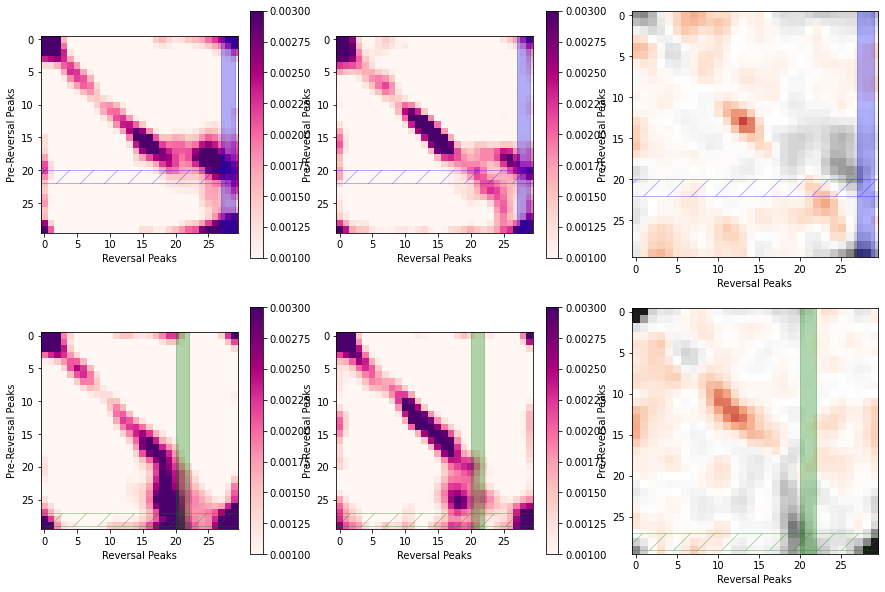

In [13]:
ko_b_max, ko_rev_max = np.argmax(ko_arrays['b_l_all'],axis=0), np.argmax(ko_arrays['rev_l_all'],axis=0)
# ko_b_max, ko_rev_max = stx.spatial_analyses.spatial_com(ko_arrays['b_l_all'].T), stx.spatial_analyses.spatial_com(ko_arrays['rev_l_all'].T)
ctrl_b_max, ctrl_rev_max = np.argmax(ctrl_arrays['b_l_all'],axis=0), np.argmax(ctrl_arrays['rev_l_all'],axis=0)
# ctrl_b_max, ctrl_rev_mask = stx.spatial_analyses.spatial_com(ctrl_arrays['b_l_all']), stx.spatial_analyses.spatial_com(ctrl_arrays['rev_l_all'])

fig,ax = plt.subplots(2, 3, figsize = [15,10])
bins = np.arange(0,31)
# x = np.linspace(0,31)[:,np.newaxis]
# max2d = np.array([b_max, rev_max]).T
# print(max2d.shape)
print(ko_b_max.shape)
def get_smooth_hist(b_max, rev_max):
    hist, xedges, yedges = np.histogram2d(b_max,rev_max, bins = [bins, bins], density = False)
    hist_sm = sp.ndimage.filters.gaussian_filter(hist, (1,1))
    hist_sm /= hist_sm.ravel().sum()
    return hist_sm

# ax[0,0].hist(ctrl_b_max-ctrl_rev_max,bins=bins,color='black', alpha = .3, density=True, cumulative=True)
# ax[0,0].hist(ko_b_max-ko_rev_max,bins=bins, alpha=.3, color='red', density=True, cumulative=True)
l_ctrl_hist_sm = get_smooth_hist(ctrl_b_max,ctrl_rev_max)
h = ax[0,0].imshow(l_ctrl_hist_sm, vmin=.001, vmax = .003, cmap='RdPu')
plt.colorbar(h, ax=ax[0,0])

l_ko_hist_sm = get_smooth_hist(ko_b_max,ko_rev_max)
h = ax[0,1].imshow(l_ko_hist_sm, vmin=.001, vmax = .003, cmap='RdPu')
plt.colorbar(h, ax=ax[0,1])

ax[0,2].imshow(l_ctrl_hist_sm-l_ko_hist_sm, cmap='RdGy', vmin=-.003, vmax= .003)


ko_b_max, ko_rev_max = np.argmax(ko_arrays['b_r_all'],axis=0), np.argmax(ko_arrays['rev_r_all'],axis=0)
ctrl_b_max, ctrl_rev_max = np.argmax(ctrl_arrays['b_r_all'],axis=0), np.argmax(ctrl_arrays['rev_r_all'],axis=0)

r_ctrl_hist_sm = get_smooth_hist(ctrl_b_max,ctrl_rev_max)
h = ax[1,0].imshow(r_ctrl_hist_sm, vmin=.001, vmax = .003, cmap='RdPu')
plt.colorbar(h, ax=ax[1,0])

r_ko_hist_sm = get_smooth_hist(ko_b_max,ko_rev_max)
h = ax[1,1].imshow(r_ko_hist_sm, vmin=.001, vmax = .003, cmap='RdPu')
plt.colorbar(h, ax=ax[1,1])

ax[1,2].imshow(r_ctrl_hist_sm-r_ko_hist_sm, cmap='RdGy', vmin=-.003, vmax= .003)


rz_early = (np.argwhere(sess.trial_matrices['bin_edges'][:-1]>=sess.rzone_early['tfront'])[0], np.argwhere(sess.rzone_early['tback']<=sess.trial_matrices['bin_edges'][1:])[0] )
rz_late = (np.argwhere(sess.trial_matrices['bin_edges'][:-1]>=sess.rzone_late['tfront'])[0], 29 )
print(rz_early,rz_late)
for col in range(3):
    ax[0,col].fill_between(np.linspace(-.5,29.5), rz_early[0], rz_early[1],  alpha=.3, hatch = '/', color='none', edgecolor='blue')
    ax[0,col].fill_betweenx(np.linspace(-.5,29.5), rz_late[0], rz_late[1],  alpha=.3, color='blue')
    
    ax[1,col].fill_betweenx(np.linspace(-.5,29.5), rz_early[0], rz_early[1],  alpha=.3, color='green')
    ax[1,col].fill_between(np.linspace(-.5,29.5), rz_late[0], rz_late[1],  alpha=.3, hatch= '/', color='none', edgecolor='green')
    
    ax[0,col].set_xlabel('Reversal Peaks')
    ax[0,col].set_ylabel('Pre-Reversal Peaks')
    
    ax[1,col].set_xlabel('Reversal Peaks')
    ax[1,col].set_ylabel('Pre-Reversal Peaks')
    

fig.savefig(os.path.join(figdir, "PlaceCellShiftHist.pdf" ),format = 'pdf')

In [7]:
print(rz_early)
print(rz_late)

(array([20]), array([22]))
(array([27]), 29)


0.08233176766746485 0.017278426445343498
0.07456463220348294 0.0032012696353573844


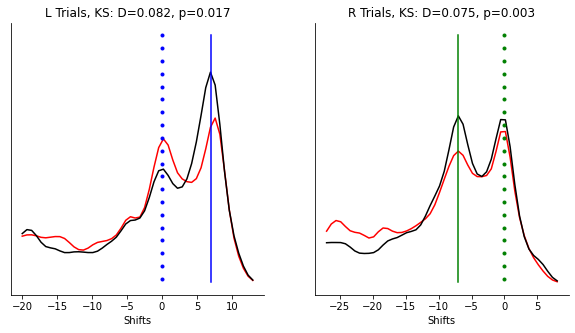

In [14]:
fig,ax = plt.subplots(1,2, sharey=True, figsize= [10,5])

## left trials
ko_b_max, ko_rev_max = np.argmax(ko_arrays['b_l_all'],axis=0), np.argmax(ko_arrays['rev_l_all'],axis=0)
ctrl_b_max, ctrl_rev_max = np.argmax(ctrl_arrays['b_l_all'],axis=0), np.argmax(ctrl_arrays['rev_l_all'],axis = 0)

ko_b_mask = (ko_b_max>17)* (ko_b_max<=22)
ko_shifts = ko_rev_max[ko_b_mask] - ko_b_max[ko_b_mask]

ctrl_b_mask = (ctrl_b_max>17) * (ctrl_b_max<=22)
ctrl_shifts = ctrl_rev_max[ctrl_b_mask] - ctrl_b_max[ctrl_b_mask]

bins = np.linspace(-20,13)[:, np.newaxis]

ko_hist =  tpu.utilities.gaussian(bins, 1.5, ko_shifts[np.newaxis,:]).mean(axis=-1)
ko_hist /= ko_hist.sum()
ax[0].plot(bins.ravel(),ko_hist, color= 'red')
ctrl_hist =  tpu.utilities.gaussian(bins, 1.5, ctrl_shifts[np.newaxis,:]).mean(axis=-1)
ctrl_hist /= ctrl_hist.sum()
ax[0].plot(bins.ravel(),ctrl_hist, color= 'black')
t,p = sp.stats.ks_2samp(ctrl_shifts,ko_shifts)
print(t,p)
ax[0].set_yticks([])
ax[0].set_xlabel('Shifts')
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title("L Trials, KS: D=%.3f, p=%.3f" % (t,p))


## right trials
ko_b_max, ko_rev_max = np.argmax(ko_arrays['b_r_all'],axis=0), np.argmax(ko_arrays['rev_r_all'],axis=0)
ctrl_b_max, ctrl_rev_max = np.argmax(ctrl_arrays['b_r_all'],axis=0), np.argmax(ctrl_arrays['rev_r_all'],axis = 0)

ko_b_mask = (ko_b_max>22)* (ko_b_max<=29)
ko_shifts = ko_rev_max[ko_b_mask] - ko_b_max[ko_b_mask]

ctrl_b_mask = (ctrl_b_max>22) * (ctrl_b_max<=29)
ctrl_shifts = ctrl_rev_max[ctrl_b_mask] - ctrl_b_max[ctrl_b_mask]

bins = np.linspace(-27,8)[:, np.newaxis]

ko_hist =  tpu.utilities.gaussian(bins, 1.5, ko_shifts[np.newaxis,:]).mean(axis=-1)
ko_hist /= ko_hist.sum()
ax[1].plot(bins.ravel(),ko_hist, color= 'red')
ctrl_hist =  tpu.utilities.gaussian(bins, 1.5, ctrl_shifts[np.newaxis,:]).mean(axis=-1)
ctrl_hist /= ctrl_hist.sum()
ax[1].plot(bins.ravel(),ctrl_hist, color= 'black')
t,p = sp.stats.ks_2samp(ctrl_shifts,ko_shifts)
print(t,p)
ax[1].set_yticks([])
ax[1].set_xlabel('Shifts')
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title("R Trials, KS: D=%.3f, p=%.3f" % (t,p))
                                                                               
_z = np.linspace(.001,.07, num=20)
ax[0].plot(0*_z,_z,marker='.',linewidth=0, color='blue')
ax[0].plot([7,7], [0,.07], color='blue')

ax[1].plot(0*_z,_z,marker='.',linewidth=0, color='green')
ax[1].plot([-7,-7], [0,.07], color='green')

fig.savefig(os.path.join(figdir, "rewardcell_shifts.pdf"), format='pdf')

In [15]:
def reversal_plots(arrays):

    fig_l, ax = plt.subplots(2,2, figsize=[10,10])
    fig_l.subplots_adjust(wspace=.3)

    b_l_sort = np.argsort(np.argmax(arrays['b_l_odd'],axis=0))
    b_l_mu, b_l_std = np.nanmean(arrays['b_l_odd'],axis=0, keepdims=True), np.nanstd(arrays['b_l_odd'], axis=0, keepdims=True)
    b_l_plot = (arrays['b_l_even']-b_l_mu)/b_l_std
    ax[0,0].imshow(b_l_plot[:,b_l_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')
    

#     rev_b_l_plot = (arrays['rev_l_all']-b_l_mu)/b_l_std
    rev_b_l_plot = sp.stats.zscore(arrays['rev_l_all'],axis=0)
    ax[0,1].imshow(rev_b_l_plot[:,b_l_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')
    

# #     ret_b_l_plot = (arrays['ret_l_all']-b_l_mu)/b_l_std
#     ret_b_l_plot = sp.stats.zscore(arrays['ret_l_all'],axis=0)
#     ax[0,2].imshow(ret_b_l_plot[:,b_l_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')
    


    rev_l_sort = np.argsort(np.argmax(arrays['rev_l_odd'],axis=0))
#     rev_l_mu, rev_l_std = np.nanmean(arrays['rev_l_odd'],axis=0, keepdims=True), np.nanstd(arrays['rev_l_odd'], axis=0, keepdims=True)
#     rev_l_plot = (arrays['rev_l_even']-rev_l_mu)/rev_l_std
    rev_l_plot = sp.stats.zscore(arrays['rev_l_even'], axis = 0)
    ax[1,1].imshow(rev_l_plot[:,rev_l_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')

#     b_rev_l_plot = (arrays['b_l_all']-rev_l_mu)/rev_l_std
    b_rev_l_plot = sp.stats.zscore(arrays['b_l_all'],axis=0)
    ax[1,0].imshow(b_rev_l_plot[:,rev_l_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')

# #     ret_rev_l_plot = (arrays['ret_l_all']-rev_l_mu)/rev_l_std
#     ret_rev_l_plot = sp.stats.zscore(arrays['ret_l_all'], axis=0)
#     ax[1,2].imshow(ret_rev_l_plot[:,rev_l_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')


#     ret_l_sort = np.argsort(np.argmax(arrays['ret_l_odd'],axis=0))
# #     ret_l_mu, ret_l_std = np.nanmean(arrays['ret_l_odd'],axis=0, keepdims=True), np.nanstd(arrays['ret_l_odd'], axis=0, keepdims=True)
# #     ret_l_plot = (arrays['ret_l_even']-ret_l_mu)/ret_l_std
#     ret_l_plot = sp.stats.zscore(arrays['ret_l_even'], axis = 0)
#     ax[2,2].imshow(ret_l_plot[:,ret_l_sort].T,cmap='pink',vmin=0,vmax=3, aspect='auto')

# #     b_ret_l_plot = (arrays['b_l_all']-ret_l_mu)/ret_l_std
#     b_ret_l_plot = sp.stats.zscore(arrays['b_l_all'], axis=0)
#     ax[2,0].imshow(b_ret_l_plot[:,ret_l_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')

# #     rev_ret_l_plot = (arrays['rev_l_all']-ret_l_mu)/ret_l_std
#     rev_ret_l_plot = sp.stats.zscore(arrays['rev_l_all'],axis=0)
#     ax[2,1].imshow(rev_ret_l_plot[:,ret_l_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')

    for r in range(2):
        for c in range(2):
            ax[r,c,].plot([-.5,29.5], [0,b_l_plot.shape[1]-1], color='blue', linewidth=3)

    ######
    fig_r, ax = plt.subplots(2,2, figsize=[10,10])
    fig_r.subplots_adjust(wspace=.3)

    b_r_sort = np.argsort(np.argmax(arrays['b_r_odd'],axis=0))
#     b_r_mu, b_r_std = np.nanmean(arrays['b_r_odd'],axis=0, keepdims=True), np.nanstd(arrays['b_r_odd'], axis=0, keepdims=True)
#     b_r_plot = (arrays['b_r_even']-b_r_mu)/b_r_std
    b_r_plot = sp.stats.zscore(arrays['b_r_even'], axis=0)
    ax[0,0].imshow(b_r_plot[:,b_r_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')

#     rev_b_r_plot = (arrays['rev_r_all']-b_r_mu)/b_r_std
    rev_b_r_plot = sp.stats.zscore(arrays['rev_r_all'], axis =0)
    ax[0,1].imshow(rev_b_r_plot[:,b_r_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')

# #     ret_b_r_plot = (arrays['ret_r_all']-b_r_mu)/b_r_std
#     ret_b_r_plot = sp.stats.zscore(arrays['ret_r_all'], axis = 0)
#     ax[0,2].imshow(ret_b_r_plot[:,b_r_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')


    rev_r_sort = np.argsort(np.argmax(arrays['rev_r_odd'],axis=0))
#     rev_r_mu, rev_r_std = np.nanmean(arrays['rev_r_odd'],axis=0, keepdims=True), np.nanstd(arrays['rev_r_odd'], axis=0, keepdims=True)
#     rev_r_plot = (arrays['rev_r_even']-rev_r_mu)/rev_r_std
    rev_r_plot = sp.stats.zscore(arrays['rev_r_even'], axis=0)
    ax[1,1].imshow(rev_r_plot[:,rev_r_sort].T,cmap='pink',vmin=0,vmax=4, aspect='auto')

#     b_rev_r_plot = (arrays['b_r_all']-rev_r_mu)/rev_r_std
    b_rev_r_plot = sp.stats.zscore(arrays['b_r_all'], axis = 0)
    ax[1,0].imshow(b_rev_l_plot[:,rev_r_sort].T, cmap = 'pink', vmin=0, vmax=4, aspect='auto')

# #     ret_rev_r_plot = (arrays['ret_r_all']-rev_r_mu)/rev_r_std
#     ret_rev_r_plot = sp.stats.zscore(arrays['ret_r_all'], axis=0)
#     ax[1,2].imshow(ret_rev_r_plot[:,rev_r_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')


#     ret_r_sort = np.argsort(np.argmax(arrays['ret_r_odd'],axis=0))
# #     ret_r_mu, ret_r_std = np.nanmean(arrays['ret_r_odd'],axis=0, keepdims=True), np.nanstd(arrays['ret_r_odd'], axis=0, keepdims=True)
# #     ret_r_plot = (arrays['ret_r_even']-ret_r_mu)/ret_r_std
#     ret_r_plot = sp.stats.zscore(arrays['ret_r_even'],axis = 0)
#     ax[2,2].imshow(ret_r_plot[:,ret_r_sort].T,cmap='pink',vmin=0,vmax=3, aspect='auto')

# #     b_ret_r_plot = (arrays['b_r_all']-ret_r_mu)/ret_r_std
#     b_ret_r_plot = sp.stats.zscore(arrays['b_r_all'], axis=0)
#     ax[2,0].imshow(b_ret_r_plot[:,ret_r_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')

# #     rev_ret_r_plot = (arrays['rev_r_all']-ret_r_mu)/ret_r_std
#     rev_ret_r_plot = sp.stats.zscore(arrays['rev_r_all'],axis = 0)
#     ax[2,1].imshow(rev_ret_r_plot[:,ret_r_sort].T, cmap = 'pink', vmin=0, vmax=3, aspect='auto')
    
    for r in range(2):
        for c in range(2):
            ax[r,c,].plot([-.5,29.5], [0,b_r_plot.shape[1]-1], color='blue', linewidth=3)
            
    return fig_l, fig_r


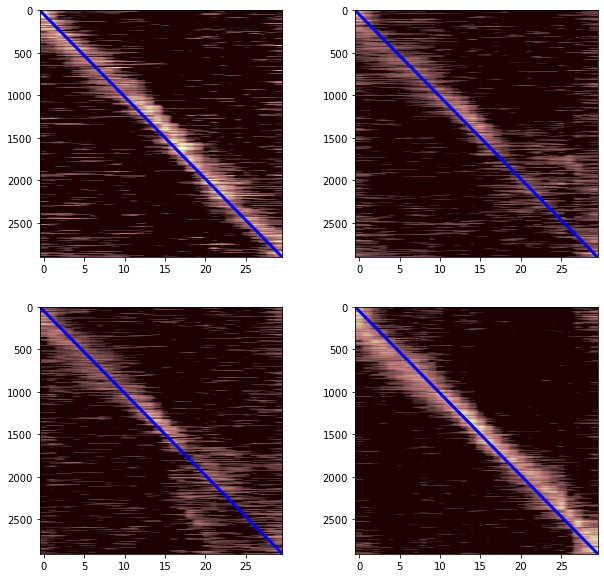

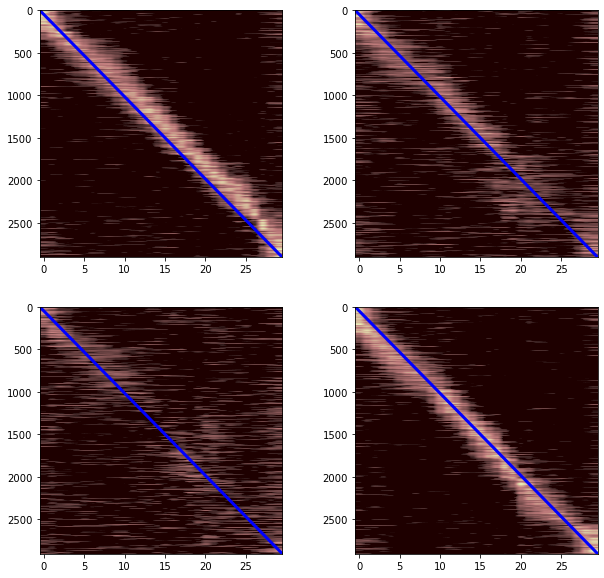

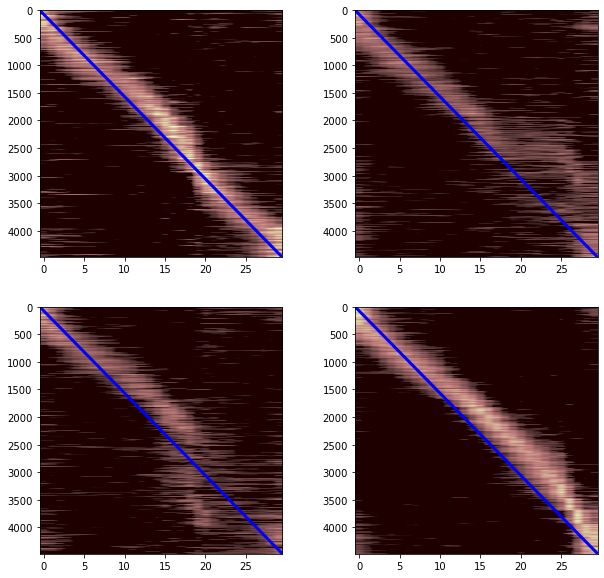

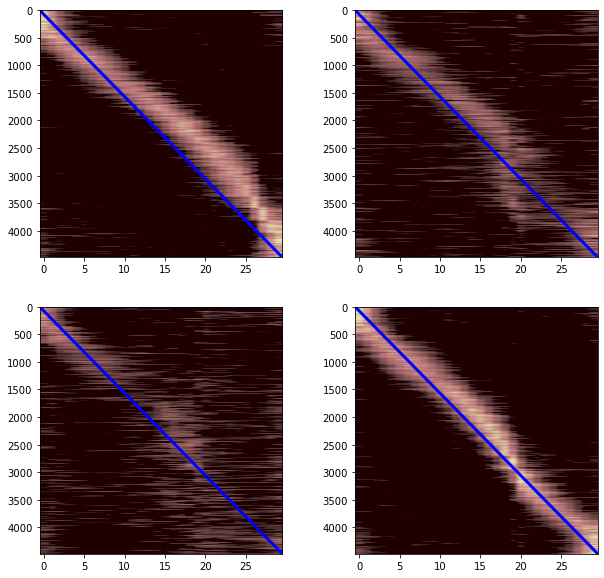

In [16]:
ko_fig_l, ko_fig_r = reversal_plots(ko_arrays)
ko_fig_l.savefig(os.path.join(figdir, "ko_l_reversal_pop_plots.pdf") , format = 'pdf')
ko_fig_r.savefig(os.path.join(figdir, "ko_r_reversal_pop_plots.pdf") , format = 'pdf')

ctrl_fig_l, ctrl_fig_r = reversal_plots(ctrl_arrays)
ctrl_fig_l.savefig(os.path.join(figdir, "ctrl_l_reversal_pop_plots.pdf") , format = 'pdf')
ctrl_fig_r.savefig(os.path.join(figdir, "ctrl_r_reversal_pop_plots.pdf") , format = 'pdf')

In [17]:
ctrl_arrays = rev_arrays(ctrl_mice, concat = False)
ko_arrays = rev_arrays(ko_mice[1:], concat = False)

05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


<ipython-input-3-b0887d960fd1>:46: RuntimeWarning: Mean of empty slice
  'ret_l_all': np.nanmean(_l_ret_tmat, axis=0),
<ipython-input-3-b0887d960fd1>:47: RuntimeWarning: Mean of empty slice
  'ret_r_all': np.nanmean(_r_ret_tmat, axis=0),
<ipython-input-3-b0887d960fd1>:48: RuntimeWarning: Mean of empty slice
  'ret_l_odd': np.nanmean(_l_ret_tmat[::2,:,:], axis=0),
<ipython-input-3-b0887d960fd1>:49: RuntimeWarning: Mean of empty slice
  'ret_r_odd': np.nanmean(_r_ret_tmat[::2,:,:], axis=0),
<ipython-input-3-b0887d960fd1>:50: RuntimeWarning: Mean of empty slice
  'ret_l_even': np.nanmean(_l_ret_tmat[1::2,:,:], axis=0),
<ipython-input-3-b0887d960fd1>:51: RuntimeWarning: Mean of empty slice
  'ret_r_even': np.nanmean(_r_ret_tmat[1::2,:,:], axis=0),


05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
06_12_2020 YMaze_LNovel
06_12_2020 YMaze_RewardReversal
07_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']


(5, 30)
(4, 30)
(5, 30)
(4, 30)
(5, 30)
(4, 30)
(5, 30)
(4, 30)
(5, 30)
(5, 30)
(4, 30)
(4, 30)
(5, 30)
(5, 30)
(4, 30)
(4, 30)
sig decrease L early
ctrl
-4.089073890838194 0.014986495355658953
ko
1.012354939694589 0.3859249859370448
sig increase L late
ctrl
0.5083898661853051 0.6379358823671191
ko
-1.8887970137573744 0.15533889676436705
sig increase R early
ctrl
2.143272754855543 0.09872425998618596
ko
-0.3711235026698004 0.7352047154000697
sig decrease R late
ctrl
-2.3046338234411703 0.08251747015984238
ko
0.39311354689879835 0.7205056873791411


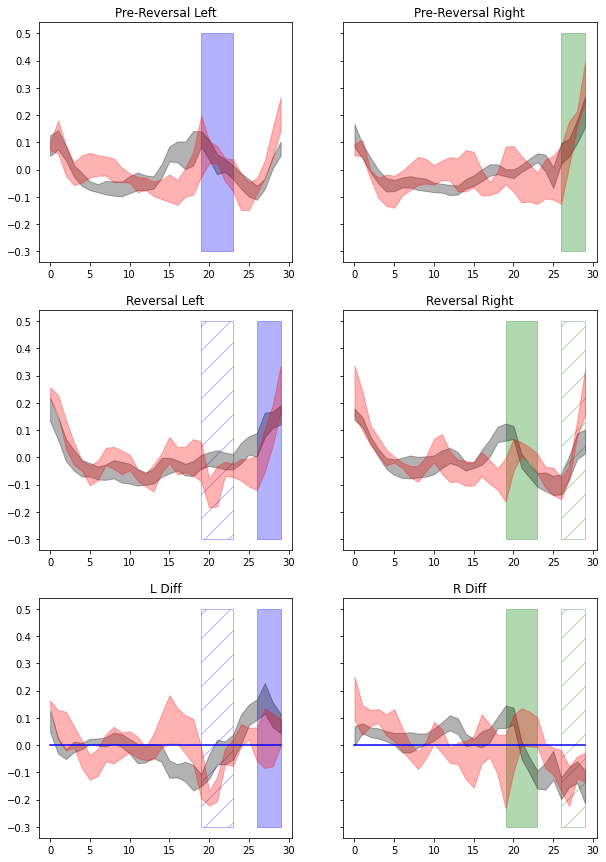

In [18]:
rz_early = (np.argwhere(sess.trial_matrices['bin_edges'][1:]>=sess.rzone_early['tfront'])[0][0], np.argwhere(sess.rzone_early['tback']<=sess.trial_matrices['bin_edges'][:-1])[0] )
rz_late = (np.argwhere(sess.trial_matrices['bin_edges'][1:]>=sess.rzone_late['tfront'])[0][0], 29 )
x = np.arange(30)
def musem(arrays):
    mu = []
    for arr in arrays:
        mu.append(sp.stats.zscore(arr,axis=0).mean(axis=1))
    mu = np.array(mu)
    print(mu.shape)
    return mu, mu.mean(axis=0), sp.stats.sem(mu,axis=0)


fig,ax = plt.subplots(3,2, figsize= [10, 15], sharey=True)

ctrl_arr, mu, sem = musem(ctrl_arrays['b_l_all'])
ax[0,0].fill_between(x, mu-sem, mu+sem, color='black', alpha = .3)
ko_arr, mu,sem = musem(ko_arrays['b_l_all'])
ax[0,0].fill_between(x, mu-sem, mu+sem, color='red', alpha = .3)
ax[0,0].fill_betweenx([-.3, .5], rz_early[0], rz_early[1],  alpha=.3, color='blue',zorder= -1)
ax[0, 0].set_title('Pre-Reversal Left')

ctrl_arr, mu, sem = musem(ctrl_arrays['b_r_all'])
ax[0,1].fill_between(x, mu-sem, mu+sem, color='black', alpha = .3)
ko_arr, mu,sem = musem(ko_arrays['b_r_all'])
ax[0,1].fill_between(x, mu-sem, mu+sem, color='red', alpha = .3)
ax[0,1].fill_betweenx([-.3, .5], rz_late[0], rz_late[1],  alpha=.3, color='green',zorder= -1)
ax[0,1].set_title("Pre-Reversal Right" )


ctrl_arr, mu, sem = musem(ctrl_arrays['rev_l_all'])
ax[1,0].fill_between(x, mu-sem, mu+sem, color='black', alpha = .3)
ko_arr, mu,sem = musem(ko_arrays['rev_l_all'])
ax[1,0].fill_between(x, mu-sem, mu+sem, color='red', alpha = .3)
ax[1,0].fill_betweenx([-.3, .5], rz_early[0], rz_early[1],  alpha=.3, color='none', hatch='/', edgecolor='blue',zorder= -1)
ax[1,0].fill_betweenx([-.3,.5], rz_late[0], rz_late[1],  alpha=.3, color='blue', zorder= -1)
ax[1,0].set_title('Reversal Left')


ctrl_arr, mu, sem = musem(ctrl_arrays['rev_r_all'])
ax[1,1].fill_between(x, mu-sem, mu+sem, color='black', alpha = .3)
ko_arr, mu,sem = musem(ko_arrays['rev_r_all'])
ax[1,1].fill_between(x, mu-sem, mu+sem, color='red', alpha = .3)
ax[1,1].fill_betweenx([-.3, .5], rz_late[0], rz_late[1],  alpha=.3, color='none', hatch='/', edgecolor='green',zorder= -1)
ax[1,1].fill_betweenx([-.3,.5], rz_early[0], rz_early[1],  alpha=.3, color='green', zorder= -1)
ax[1,1].set_title('Reversal Right')


l_pre_ctrl_arr, _, _ = musem(ctrl_arrays['b_l_all'])
l_rev_ctrl_arr, _, _ = musem(ctrl_arrays['rev_l_all'])
arr = l_rev_ctrl_arr-l_pre_ctrl_arr
mu,sem = arr.mean(axis=0), sp.stats.sem(arr, axis=0)
ax[2,0].fill_between(x, mu-sem, mu+sem, color='black', alpha=.3)

l_pre_ko_arr, _, _ = musem(ko_arrays['b_l_all'])
l_rev_ko_arr, _, _ = musem(ko_arrays['rev_l_all'])
arr = l_rev_ko_arr - l_pre_ko_arr
mu,sem = arr.mean(axis=0), sp.stats.sem(arr, axis=0)
ax[2,0].fill_between(x, mu-sem, mu+sem, color='red', alpha=.3)

ax[2,0].fill_betweenx([-.3, .5], rz_early[0], rz_early[1],  alpha=.3, color='none', hatch='/', edgecolor='blue',zorder= -1)
ax[2,0].fill_betweenx([-.3,.5], rz_late[0], rz_late[1],  alpha=.3, color='blue', zorder= -1)
ax[2,0].plot(x, 0*x, color='blue')
ax[2,0].set_title("L Diff")


r_pre_ctrl_arr, _, _ = musem(ctrl_arrays['b_r_all'])
r_rev_ctrl_arr, _, _ = musem(ctrl_arrays['rev_r_all'])
arr = r_rev_ctrl_arr-r_pre_ctrl_arr
mu,sem = arr.mean(axis=0), sp.stats.sem(arr, axis=0)
ax[2,1].fill_between(x, mu-sem, mu+sem, color='black', alpha=.3)

r_pre_ko_arr, _, _ = musem(ko_arrays['b_r_all'])
r_rev_ko_arr, _, _ = musem(ko_arrays['rev_r_all'])
arr = r_rev_ko_arr - r_pre_ko_arr
mu,sem = arr.mean(axis=0), sp.stats.sem(arr, axis=0)
ax[2,1].fill_between(x, mu-sem, mu+sem, color='red', alpha=.3)

ax[2,1].fill_betweenx([-.3, .5], rz_late[0], rz_late[1],  alpha=.3, color='none', hatch='/', edgecolor='green',zorder= -1)
ax[2,1].fill_betweenx([-.3,.5], rz_early[0], rz_early[1],  alpha=.3, color='green', zorder= -1)
ax[2,1].plot(x, 0*x, color='blue')
ax[2,1].set_title("R Diff")

fig.savefig(os.path.join(figdir, "NormActivityRateVPos.pdf"), format='pdf')

print('sig decrease L early')
print('ctrl')
t,p = sp.stats.ttest_rel(l_rev_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1), l_pre_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1))
print(t,p)
print('ko')
t,p = sp.stats.ttest_rel(l_rev_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1), l_pre_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1))
print(t,p)
# print('diff')
# ctrl_arr = l_rev_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1) - l_pre_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1)
# ko_arr = l_rev_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1) - l_pre_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1)
# t,p = sp.stats.ttest_ind(ctrl_arr,ko_arr)
# print(t,p)

print('sig increase L late')
print('ctrl')
t,p = sp.stats.ttest_rel(l_rev_ctrl_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1), l_pre_ctrl_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1))
print(t,p)
print('ko')
t,p = sp.stats.ttest_rel(l_rev_ko_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1), l_pre_ko_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1))
print(t,p)

print('sig increase R early')
print('ctrl')
t,p = sp.stats.ttest_rel(r_rev_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1), r_pre_ctrl_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1))
print(t,p)
print('ko')
t,p = sp.stats.ttest_rel(r_rev_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1), r_pre_ko_arr[:,rz_early[0]-5:rz_early[0]].mean(axis=1))
print(t,p)

print('sig decrease R late')
print('ctrl')
t,p = sp.stats.ttest_rel(r_rev_ctrl_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1), r_pre_ctrl_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1))
print(t,p)
print('ko')
t,p = sp.stats.ttest_rel(r_rev_ko_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1), r_pre_ko_arr[:,rz_late[0]-5:rz_late[0]].mean(axis=1))
print(t,p)

In [19]:

def corr_ratio_rev(concat_sess, metric = 'corr', cellavg = True):
    cellmask = concat_sess.fam_place_cell_mask()+concat_sess.nov_place_cell_mask()>0
    if not cellavg:
        trialmat = concat_sess.trial_matrices['spks_norm'][:,:,cellmask]
    else:
        trialmat = concat_sess.trial_matrices['spks'][:,:,cellmask]
    trialmat = trialmat[:,10:,:]
    trialmat[np.isnan(trialmat)] = 1E-3
    trialmat = sp.ndimage.filters.gaussian_filter1d(trialmat[:,:,:],1,axis=1)
    lickmat = concat_sess.trial_matrices['licks']
#     lickmat[np.isnan(lickmat)]=0.

    res = {}
    for lr in [-1,1]:
    
        baseline_mask = (concat_sess.trial_info['sess_num']==6)*(concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['LR']==lr)
        baseline_mask[concat_sess.trial_info['sess_num']<6]=True
        baseline = trialmat[baseline_mask,:,:].mean(axis=0,keepdims=True)
        if lr == -1:
            print('lr', concat_sess.rzone_early['t_antic'], concat_sess.rzone_early['tfront'])
            rzone_mask = (concat_sess.trial_matrices['bin_edges'][:-1]>=concat_sess.rzone_early['t_antic']) * (concat_sess.trial_matrices['bin_edges'][1:]<=concat_sess.rzone_early['tfront'])
        elif lr == 1:
            rzone_mask = (concat_sess.trial_matrices['bin_edges'][:-1]>=concat_sess.rzone_late['t_antic']) * (concat_sess.trial_matrices['bin_edges'][1:]<=concat_sess.rzone_late['tfront'])
        
        

        endpoint_mask = (concat_sess.trial_info['sess_num']==8)*(concat_sess.trial_info['block_number']<2)*(concat_sess.trial_info['LR']==lr)
        endpoint_mask[(concat_sess.trial_info['sess_num']==7)*(concat_sess.trial_info['block_number']>3)*(concat_sess.trial_info['LR']==lr)] = True
        endpoint = trialmat[endpoint_mask,:,:].mean(axis=0,keepdims=True)


        test_mask = (concat_sess.trial_info['LR']==lr) *(concat_sess.trial_info['sess_num']==6)*(concat_sess.trial_info['block_number']>=2)
#         test_mask[(concat_sess.trial_info['sess_num']==7)*(concat_sess.trial_info['block_number']<=3)*(concat_sess.trial_info['LR']==lr)] = True
#         test_mask = (concat_sess.trial_info['sess_num']==7)*(concat_sess.trial_info['block_number']<=3)*(concat_sess.trial_info['LR']==lr)
        test = trialmat[test_mask,:,:]
        
        
        
        
        
        assert (metric in ('corr', 'cos')), "wrong metric"
                
        if metric == 'corr':
            if cellavg:
                baseline = sp.stats.zscore(baseline,axis=1)
                endpoint = sp.stats.zscore(endpoint,axis=1)
                test = sp.stats.zscore(test,axis=1)


                _corr_to_baseline = 1./test.shape[1]*np.matmul(np.transpose(test,axes=(0,2,1)),baseline)   
                _corr_to_endpoint = 1./test.shape[1]*np.matmul(np.transpose(test,axes=(0,2,1)),endpoint)
                
                corr_base_end = np.diag(1./test.shape[1]*np.squeeze(np.matmul(np.transpose(baseline,axes=(0,2,1)),endpoint)))
            else:
                baseline = sp.stats.zscore(baseline,axis=-1)
                endpoint = sp.stats.zscore(endpoint,axis=-1)
                test = sp.stats.zscore(test,axis=-1)


                _corr_to_baseline = 1./test.shape[-1]*np.matmul(baseline, np.transpose(test,axes=(0,2,1)))   
                _corr_to_endpoint = 1./test.shape[-1]*np.matmul(endpoint, np.transpose(test,axes=(0,2,1)))
                
                corr_base_end = np.diag(1./test.shape[-1]*np.squeeze(np.matmul(endpoint, np.transpose(baseline,axes=(0,2,1)))))
 
        elif metric == 'cos':
            if cellavg:
                baseline /= np.linalg.norm(baseline,ord=2,axis=1, keepdims=True) + 1E-3
                endpoint /= np.linalg.norm(endpoint,ord=2,axis=1, keepdims=True) + 1E-3
                test /= np.linalg.norm(test,ord=2,axis=1, keepdims=True) + 1E-3
            
                _corr_to_baseline = np.matmul(np.transpose(test,axes=(0,2,1)),baseline)
                _corr_to_endpoint = np.matmul(np.transpose(test,axes=(0,2,1)),endpoint)
                
                corr_base_end = np.diag(np.squeeze(np.matmul(np.transpose(baseline,axes=(0,2,1)),endpoint)))
            else:
                baseline /= np.linalg.norm(baseline,ord=2,axis=-1, keepdims=True) + 1E-3
                endpoint /= np.linalg.norm(endpoint,ord=2,axis=-1, keepdims=True) + 1E-3
                test /= np.linalg.norm(test,ord=2,axis=-1, keepdims=True) + 1E-3
            
                _corr_to_baseline = np.matmul(baseline, np.transpose(test,axes=(0,2,1)))
                _corr_to_endpoint = np.matmul(endpoint, np.transpose(test,axes=(0,2,1)))
   
                corr_base_end = np.diag(np.squeeze(np.matmul(endpoint, np.transpose(baseline,axes=(0,2,1)))))
                
            
            
            
        corr_to_baseline = np.array([np.diag(_corr_to_baseline[trial,:,:]).mean() for trial in range(test.shape[0])])
        corr_to_endpoint = np.array([np.diag(_corr_to_endpoint[trial,:,:]).mean() for trial in range(test.shape[0])])
#         print(corr_to_baseline)
#         print(corr_to_endpoint)
        
        res[lr]= {'trial': -1*np.log(np.maximum(1E-3,corr_to_endpoint)) + np.log(np.maximum(1E-3,corr_to_baseline)), 
                  'endpoints': corr_base_end}
        
    return res




ko_corr_ratio = {mouse:corr_ratio_rev(stx.utilities.single_mouse_concat_sessions(mouse,date_inds=[ 6, 7]),metric='cos', cellavg = True ) for mouse in stx.ymaze_sess_deets.KO_sessions.keys() if mouse not in ['4467975.1']}
ctrl_corr_ratio = {mouse:corr_ratio_rev(stx.utilities.single_mouse_concat_sessions(mouse,date_inds=[6, 7]),metric='cos', cellavg= True ) for mouse in stx.ymaze_sess_deets.CTRL_sessions.keys()}


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:95: UserWarning: skipping checking keys, remaining initialization not guaranteed to work
  warnings.warn("skipping checking keys, remaining initialization not guaranteed to work")
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_LNovel/YMaze_LNovel_001_002.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_LNovel


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/04_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_005.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


04_10_2020 YMaze_RewardReversal


/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:227: UserWarning: Could not find sbxmat file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.mat
  warnings.warn("Could not find sbxmat file at %s" % self.scanheader_file)
/home/mplitt/repos/TwoPUtils/TwoPUtils/sess.py:236: UserWarning: Could not find sbx file at /mnt/BigDisk/2P_scratch/4467975.2/05_10_2020/YMaze_RewardReversal/YMaze_RewardReversal_001_003.sbx
  warnings.warn("Could not find sbx file at %s" % self.scan_file)


05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
04_10_2020 YMaze_LNovel
04_10_2020 YMaze_RewardReversal
05_10_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
['LR', 'block_number', 'sess_num_ravel', 'sess_num']
lr 25.67690445738824 32.67690445738824
05_12_2020 YMaze_LNovel
05_12_2020 YMaze_RewardReversal
06_12_2020 YMaze_RewardReversal
['LR', 'block_number', 'sess_num_rav

L endpoints 1.5394226521394763 0.1675946110326483
endpoints 2.538836500917371 0.038729767633096046
ko_slopes  [[-0.00550428 -0.00383206]
 [-0.0063365  -0.00539281]
 [-0.00391274 -0.00495845]
 [-0.00488071 -0.00858276]]
-2.9967709001790444 0.020033437960196684
-1.1574775016102121 0.2850421840139225


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


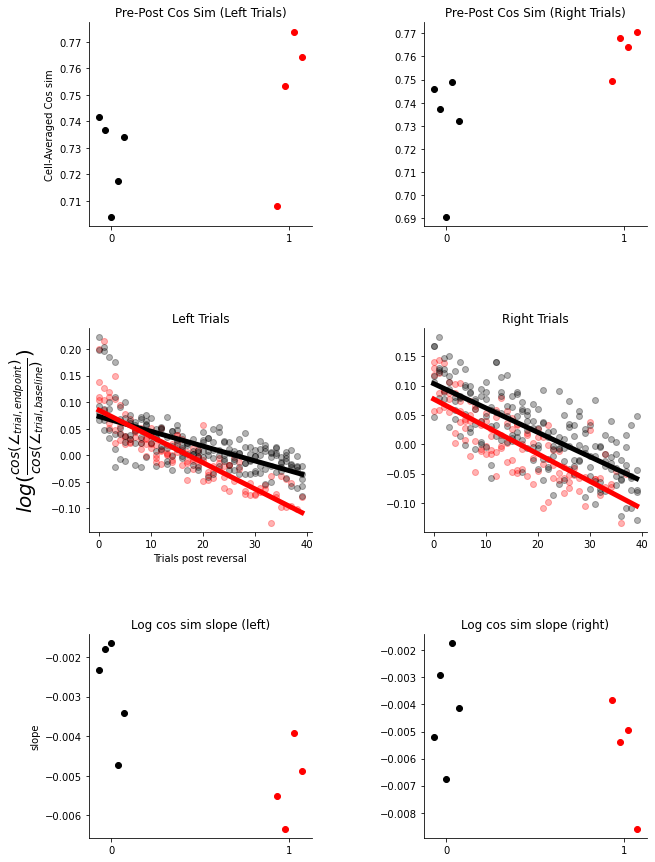

In [25]:
fig,ax = plt.subplots(3,2, figsize=[10,15])
fig.subplots_adjust(wspace=.5, hspace=.5)

rng = np.random.default_rng()


## correlation to endpoints
ko_jitter = np.linspace(-.07,.07,num=4) #.05*rng.standard_normal([4,])
ctrl_jitter = np.linspace(-.07,.07,num=5) #.05*rng.standard_normal([5,])

# [res[-1]['endpoints'] for mouse, res in ko_corr_ratio.items()]
l_ko_corr = [res[-1]['endpoints'].mean() for mouse, res in ko_corr_ratio.items() if mouse not in ['4467975.1']]
l_ctrl_corr = [res[-1]['endpoints'].mean() for mouse, res in ctrl_corr_ratio.items()]# if mouse not in ['4467975.1']]
t,p = sp.stats.ttest_ind(l_ko_corr,l_ctrl_corr)
# t,p = sp.stats.ranksums(l_ko_corr,l_ctrl_corr)
print('L endpoints', t, p)
ax[0,0].scatter(np.ones([4,]) + ko_jitter,l_ko_corr,color='red')
ax[0,0].scatter(np.zeros([5,])+ ctrl_jitter,l_ctrl_corr,color='black')
ax[0,0].set_xticks([0,1])
# ax[0,0].set_ylim([.68, .8])
ax[0,0].set_ylabel('Cell-Averaged Cos sim')
ax[0,0].set_title('Pre-Post Cos Sim (Left Trials)')



r_ko_corr = [res[1]['endpoints'].mean() for mouse, res in ko_corr_ratio.items() if mouse not in ['4467975.1']]
r_ctrl_corr = [res[1]['endpoints'].mean() for mouse, res in ctrl_corr_ratio.items()]# if mouse not in ['4467975.1']]
t,p = sp.stats.ttest_ind(r_ko_corr,r_ctrl_corr)
# t,p = sp.stats.ranksums(r_ko_corr,r_ctrl_corr)
print('endpoints', t, p)
ax[0,1].scatter(np.ones([4,]) + ko_jitter, r_ko_corr,color='red')
ax[0,1].scatter(np.zeros([5,]) + ctrl_jitter, r_ctrl_corr,color='black')
ax[0,1].set_xticks([0,1])
# ax[0,1].set_ylim([.68, .8])
ax[0,1].set_title('Pre-Post Cos Sim (Right Trials)')
    
## trial by trial change in correlation

df_l = pd.DataFrame({'mouse':[],
                  'trial': [],
                  'ko': [],
                  'ko_x_trial': [],
                  'llr': [],
                  'intercept': [],
                  })
df_r = pd.DataFrame({'mouse':[],
                  'trial': [],
                  'ko': [],
                  'ko_x_trial': [],
                  'llr': [],
                  'intercept': [],
                  })

ko_slopes =  np.zeros([4,2])
m = 0
for mouse, res  in ko_corr_ratio.items():
    for i, lr in enumerate([-1,1]):
        arr = res[lr]['trial'][:40]
        trials = np.arange(0,np.amin([40,arr.shape[0]]))
        
        for t, a in enumerate(arr):
            if i ==0:
                df_l = df_l.append({'mouse': mouse,
                                   'trial': t,
                                   'ko': 1,
                                   'ko_x_trial': t,
                                   'llr': a,
                                   'intercept': 1},ignore_index=True)
            else:
                df_r = df_r.append({'mouse': mouse,
                                   'trial': t,
                                   'ko': 1,
                                   'ko_x_trial': t,
                                   'llr': a,
                                   'intercept': 1},ignore_index=True)
        
#         trials = np.arange(0,arr.shape[0])
#         print(arr)
        if mouse not in ['4467975.1']:
            ax[1,i].scatter(trials, arr, color='red',alpha=.3)

            reg_res = sp.stats.linregress(trials,arr)
#             print(mouse, 'lr',lr,reg_res.slope)
            ko_slopes[m,i] = reg_res.slope
            if i==1:
                m+=1
        
ctrl_slopes =  np.zeros([5,2])
for m, (mouse, res)  in enumerate(ctrl_corr_ratio.items()):
    for i, lr in enumerate([-1,1]):
        arr = res[lr]['trial'][:40]
        trials = np.arange(0,np.amin([40,arr.shape[0]]))
        for t, a in enumerate(arr):
            if i ==0:
                df_l = df_l.append({'mouse': mouse,
                                   'trial': t,
                                   'ko': 0,
                                   'ko_x_trial': 0,
                                   'llr': a,
                                   'intercept': 1},ignore_index=True)
            else:
                df_r = df_r.append({'mouse': mouse,
                                   'trial': t,
                                   'ko': 0,
                                   'ko_x_trial': 0,
                                   'llr': a,
                                   'intercept': 1},ignore_index=True)
#         trials = np.arange(0,arr.shape[0])
#         if mouse not in ['4467975.1']:
        ax[1,i].scatter(trials, arr, color='black',alpha=.3)
            
        
        reg_res = sp.stats.linregress(trials,arr)
        ctrl_slopes[m,i] = reg_res.slope

ax[1,0].set_ylabel(r'$log(\frac{cos(\angle_{trial, endpoint})}{cos(\angle_{trial, baseline})})$',fontsize=20)
ax[1,0].set_title('Left Trials')
ax[1,1].set_title('Right Trials')
ax[1,0].set_xlabel('Trials post reversal')



## slopes
ax[2,0].scatter(np.ones([4,]) + ko_jitter, ko_slopes[:,0], color='red')
ax[2,0].scatter(np.zeros([5,]) + ctrl_jitter, ctrl_slopes[:,0], color='black')
ax[2,0].set_xticks([0,1])
# ax[2,0].set_ylim([-.015, 0])
ax[2,0].set_ylabel('slope')
ax[2,0].set_title('Log cos sim slope (left)')

print('ko_slopes ', ko_slopes)
ax[2,1].scatter(np.ones([4,]) + ko_jitter, ko_slopes[:,1], color='red')
ax[2,1].scatter(np.zeros([5,]) + ctrl_jitter, ctrl_slopes[:,1], color='black')
ax[2,1].set_xticks([0,1])
# ax[2,1].set_ylim([-.015, 0])
ax[2,1].set_title('Log cos sim slope (right)')

t,p = sp.stats.ttest_ind(ko_slopes[:,0],ctrl_slopes[:,0])
# t,p = sp.stats.ranksums(ko_slopes[:,0],ctrl_slopes[:,0])
print(t,p)

t,p = sp.stats.ttest_ind(ko_slopes[:,1],ctrl_slopes[:,1])
# t,p = sp.stats.ranksums(ko_slopes[:,1],ctrl_slopes[:,1])
print(t,p)
    

    
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_l['mouse'])
lmm_resf = lmm_res.fit()
trials = np.arange(0,40)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[1,0].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[1,0].plot(trials,y, color='red',linewidth=5)


lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_r['mouse'])
lmm_resf = lmm_res.fit()
trials = np.arange(0,40)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']
ax[1,1].plot(trials, y, color = 'black',linewidth=5)
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax[1,1].plot(trials,y, color='red',linewidth=5)


for i in range(3):
    for j in range(2):
        ax[i,j].spines['top'].set_visible(False)
        ax[i,j].spines['right'].set_visible(False)
        
fig.savefig(os.path.join(figdir,"remapping_rate.pdf"),format='pdf')

In [49]:
lmm_res = MixedLM(df_l['llr'], df_l[[ 'trial', 'ko_x_trial', 'ko', 'intercept']], df_l['mouse'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: llr     
No. Observations: 324     Method:             REML    
No. Groups:       9       Scale:              0.0010  
Min. group size:  20      Log-Likelihood:     631.1052
Max. group size:  40      Converged:          Yes     
Mean group size:  36.0                                
------------------------------------------------------
           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------
trial      -0.003    0.000 -14.376 0.000 -0.003 -0.002
ko_x_trial -0.002    0.000  -6.284 0.000 -0.003 -0.001
ko          0.012    0.010   1.230 0.219 -0.007  0.031
intercept   0.073    0.006  11.598 0.000  0.061  0.085
Group Var   0.000    0.002                            

trial         7.320298e-47
ko_x_trial    3.309195e-10
ko            2.185671e-01
intercept     4.193854e-31
Group Var     1.425260e-01
dtype: float64


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [47]:
lmm_resf.fe_params

trial        -0.002705
ko_x_trial   -0.002260
ko            0.085034
dtype: float64

[ 0.07301935  0.07023576  0.06745217  0.06466858  0.06188499  0.0591014
  0.05631781  0.05353422  0.05075063  0.04796703  0.04518344  0.04239985
  0.03961626  0.03683267  0.03404908  0.03126549  0.0284819   0.02569831
  0.02291472  0.02013113  0.01734754  0.01456395  0.01178036  0.00899677
  0.00621318  0.00342958  0.00064599 -0.0021376  -0.00492119 -0.00770478
 -0.01048837 -0.01327196 -0.01605555 -0.01883914 -0.02162273 -0.02440632
 -0.02718991 -0.0299735  -0.03275709 -0.03554068]


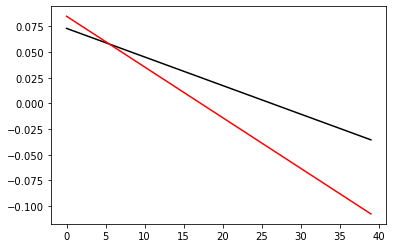

In [52]:
trials = np.arange(0,40)
y = trials*lmm_resf.params['trial'] + lmm_resf.params['intercept']

fig,ax = plt.subplots()
ax.plot(trials, y, color = 'black')
y = trials*(lmm_resf.params['trial'] +lmm_resf.params['ko_x_trial']) + lmm_resf.params['intercept'] + lmm_resf.params['ko']
ax.plot(trials,y, color='red')

In [35]:
lmm_resf.random_effects

{'4467331.1': Group Var    0.057313
 dtype: float64,
 '4467331.2': Group Var    0.072144
 dtype: float64,
 '4467332.1': Group Var    0.076325
 dtype: float64,
 '4467332.2': Group Var    0.059577
 dtype: float64,
 '4467333.1': Group Var    0.089353
 dtype: float64,
 '4467975.2': Group Var    0.008736
 dtype: float64,
 '4467975.3': Group Var    0.004376
 dtype: float64,
 '4467975.4': Group Var   -0.005419
 dtype: float64,
 '4467975.5': Group Var   -0.007693
 dtype: float64}

In [24]:
lmm_res = MixedLM(df_r['llr'], df_r[[ 'trial', 'ko_x_trial', 'ko']], df_r['mouse'])
lmm_resf = lmm_res.fit()
print(lmm_resf.summary())
print(lmm_resf.pvalues)

        Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: llr     
No. Observations: 317     Method:             REML    
No. Groups:       9       Scale:              0.0014  
Min. group size:  17      Log-Likelihood:     565.8652
Max. group size:  40      Converged:          Yes     
Mean group size:  35.2                                
------------------------------------------------------
           Coef.  Std.Err.    z    P>|z| [0.025 0.975]
------------------------------------------------------
trial      -0.004    0.000 -18.147 0.000 -0.004 -0.004
ko_x_trial -0.001    0.000  -1.951 0.051 -0.002  0.000
ko          0.092    0.008  11.282 0.000  0.076  0.108
Group Var   0.000    0.007                            

trial         1.355593e-73
ko_x_trial    5.110754e-02
ko            1.604058e-29
Group Var     8.554313e-02
dtype: float64


/home/mplitt/anaconda3/envs/STX3_test/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [ ]:
# neural slope vs behavioral slope